<font color='red'>
    
This is a lab demo for ORIE 1101 by Sander Aarts, 2020.
    
Based on 'Lab 11: Matrix Games' by David Williamson, 2013.
    
Penalty kick application based on 'Professionals Play Minimax' by Ignacio Palacios-Huerta (2003).
    
Additional data from:
    
    > https://www.thestatszone.com/archive/statistical-insight-into-penalty-shootouts-where-to-place-your-penalty-13886
    > https://www.thestatszone.com/archive/an-analyses-of-penalty-taking-trends-in-the-champions-league-13654
    
Meta comments in red; solutions in blue.
    
</font>

# Lab XX: Matrix Games & Penalty Kicks

### Objectives:
 - Introduce students to basic concepts in 0-sum 2-person games
 - Give students experience at computing optimal mixed minmax strategies
 - Give students experience at playing games
 
### Key Ideas: 
 - 0-sum 2-person games
 - Payoff matrix
 - Pure strategies
 - Mixed strategies
 - Expected payoffs
 - Optimal solution
 - Fair games
 
### Brief description:
In this lab, we consider penalty kicks in soccer as an example of a simple game. First, you
will be introduced to the rules and setting. Nest you will play several rounds of the game against the computer. Finally, you will formally solve this game by describing strategies available to the players and characterizing equilibrium strategies and payoffs.

## Part 1: Introducing and playing the Penalty Kick game

In soccer (football) a penalty kick is awarded agaist the tham that commits a punishable foul inside their penalty area. The fouled team chooses one player that is allowed to take one free kick at the opposing team's goal while only the goalkeeper can defend. No other players may interfere, so the penalty kick can be seen as a one-shot game with two players. The kicker wants to kick the ball into the goal; the goalie wants to prevent this from happening. I.e. tho two players' goals are diametrically opposed. Moreover, following a kick it typically takes the ball about 0.3 seconds to reach the goal, making it impossible for the goalkeeper to react to the kicker's action; both the kicker and the the goalkeeper must decide what to do without knowing the other player's action.

<br>

<div style="align: left; text-align:center;">
    <img src="https://usatftw.files.wordpress.com/2015/06/untitled-111.gif" alt="Carli Lloyd (US) scoring a penalty kick against Germany, 2015" title="Carli Lloyd (US) scoring a penalty kick against Germany, 2015. Retrieved from https://usatftw.files.wordpress.com/2015/06/untitled-111.gif"  width="360px" />
    <div class="caption">Figure 1: A penalty kick. The kicker plays Left; the goalkeeper Right. It's a goal!
    </div>
</div>


<br>

You will play a simple version of the penalty kick game. The rules are as follows:
 - You are the goalkeeper. One by one different kickers shoot penalty kicks at your goal.
 - Your goal is to save as many goals as possible (minimize number of goals).
 - The opposing team first chooses a left- or right-footed kicker. You are informed of which.
 - The computer then commits to an action;  options are to kick to the goalie's **Left**, her **Right**, or at the **Middle**.
 - Before knowing kicker's choice, you commit to jumping **Left**, jumping **Right**, or to say in the **Middle**.
 - After both players lock in their decicisons, each player's action are revelaed.
 - The type of kicker, the kicker's action, and you action jointly determine the probability of a win.
 - A goal / no goal is drawn according to this probability. A goal generates 1 point; a save -1. You want to minimize the total score.
 - The table below shows the scoring probabilities for all possible outcomes.
 
 <br>
 
<div style="align: left; text-align:center;">
    <table style="width:60%">
  <tr>
    <th>Scoring Probability</th>
    <th>LL</th>
    <th>LM</th>
    <th>LR</th>
    <th>ML</th>
    <th>MM</th>
    <th>MR</th>
    <th>RL</th>
    <th>RM</th>
    <th>RR</th>
  </tr>
  <tr>
    <td>Right-footed kicker</td>
    <td>.55</td>
    <td>.65</td>
    <td>.93</td>
    <td>.74</td>
    <td>.60</td>
    <td>.72</td>
    <td>.95</td>
    <td>.73</td>
    <td>.70</td>
  </tr>
  <tr>
    <td>Left-footed kicker</td>
    <td>.67</td>
    <td>.70</td>
    <td>.96</td>
    <td>.74</td>
    <td>.60</td>
    <td>.72</td>
    <td>.87</td>
    <td>.65</td>
    <td>.61</td>
  </tr>
</table>
    <div class="caption">Table 1: The first letter in a column denotes the kicker's choice, the latter the goalie's choice. </div>
</div> 
 

Play 50 rounds against the computer in the cell below. The computer is not dumb
(or at least, it has not been programmed in a stupid way) and so it follows "fictious play" by tying to play its best action against your past choices. When you finish the run of 50 times, the program will report your overall score.  Try to do as well as you can. (You must trust the software that the goals are determined honestly from the listed probabilities.) How well did you do? 



In [ ]:
# Play fictitious play

## Part 2: Solving the Penalty Kick game

In this part of the lab, we will try to analyze the game that you have just played. In formulating a 2-person
0-sum game the first step is to figure out all of the pure strategies (not just the good ones) for each of
the players. Remember, one strategy can be thought of as a complete set of instructions that you can give
someone else, so that he or she plays just as you would until the end of the game (without knowing which
moves will be taken in advance). We will break the game down into sub-games to make things easier.

1. Give the six pure strategies that the computer might have played. (In fact, the computer only plays only
two of them.)

<font color='blue'>
   <b>Solution:</b> The computer can choose the following pure strategies:
    
 - Pick a right-footed striker and kick Right (rR).
 - Pick a right-footed striker and kick Middle (rM).
 - Pick a right-footed striker and kick Left (rL).
 - Pick a left-footed striker and kick Right (lR).
 - Pick a right-footed striker and kick Middle (lM).
 - Pick a right-footed striker and kick Left (lL).
</font>

2. After the computer picks a striker her dominant foot is accounced, you only have three pure strategies available; Right, Middle, and Left. However, let's imagine giving written instructions to the goalkeeper, in a way that specifies exactly what to do for any possibile action the computer takes.
<br>
<br>
E.g. "If the striker is left footed, jump left, if right-footed, stay in middle."
<br>
<br>
Give the two four different (non-randomized) instructions that you could give.

<font color='blue'>
    <b>Solution:</b> The computer can choose the following pure strategies:
    
 - If a right-footed striker is chosen, jump Right (RR).
 - If a right-footed striker is chosen, stay in Middle (RM).
 - If a right-footed striker is chosen, jump Left (RL).
 - If a left-footed striker is chosen, jump Right (LR).
 - If a left-footed striker is chosen, stay in Middle (LM).
 - If a left-footed striker is chosen, jump Left (LL).
</font>

3. Now consider two sub-games. In one game the striker has been fixed to be right-footed; in another she is fixed as left-footed.
<br>
Write down the <b>two</b> 3-by-3 payoff matrices. Each cell should contain the pobability of a goal.

<font color='blue'>
    <b>Solution:</b> See tables.
</font>

<div style="align: left; text-align:center;">
    <table style="width:60%">
    <tr>
        <th>Right-footed striker</th>
        <th>L</th>
        <th>M</th>
        <th>R</th>
    </tr>
    <tr>
        <td>L</td>
        <td>.55</td>
        <td>.65</td>
        <td>.93</td>
    </tr>
    <tr>
        <td>M</td>
        <td>.74</td>
        <td>.60</td>
        <td>.72</td>
    </tr>
    <tr>
        <td>R</td>
        <td>.95</td>
        <td>.70</td>
        <td>.70</td>
    </tr>
    </table>
        <div class="caption">Table (a): Right-footed striker payoff table. The striker is the column player. </div>
</div>

<br>

<div style="align: left; text-align:center;">
    <table style="width:60%">
    <tr>
        <th>Left-footed striker</th>
        <th>L</th>
        <th>M</th>
        <th>R</th>
    </tr>
    <tr>
        <td>L</td>
        <td>.67</td>
        <td>.70</td>
        <td>.96</td>
    </tr>
    <tr>
        <td>M</td>
        <td>.74</td>
        <td>.60</td>
        <td>.72</td>
    </tr>
    <tr>
        <td>R</td>
        <td>.87</td>
        <td>.65</td>
        <td>.61</td>
    </tr>
    </table>
        <div class="caption">Table (b): Left-footed striker payoff table. The striker is the column player. </div>
</div> 

4. In each matrix, are any strategies dominated by other ones? Did you susepect this from the start?
<br>
(Hint: A strategy can be dominated by a mixed strategy; try randomizing 50/50 over two strategies and see how they compare against the third.)

<font color='blue'>
    <b>Solution:</b> In both sub-games the middle stragey, for both the goalkeeper and striker, is dominated by e.g. a 50/50 mix of L and R.
    
Intution may require football insight, but for ones that know, professional players almost never shoot at the middle, and goalies almost never stay put in the middle either.
</font>

5. Use the graphical method to find the optimal strategy for the goalkeeper in both matrix-games. Do the equilibrium strategies make intuitive sense?
<br>
(Hint: By dominance in part 4. both matrices should be of size 2-by-2).

<font color='red'>
    We may want to let students just plug in the right values and use the plotting machinery. Though it does feel educational to let them draw by hand.
</font>

<font color='blue'>
    <b>Solution:</b> Run cell below.
</font>

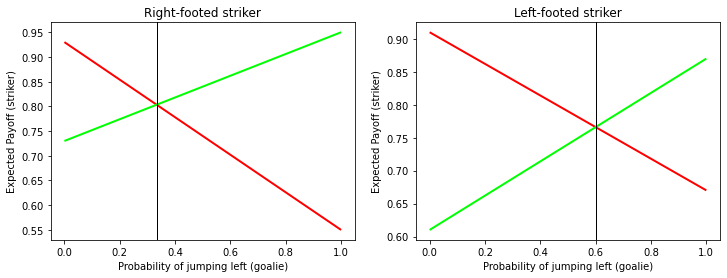

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as col

ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
#ax[0].plot(x1, y1)
#ax[1].plot(x2, y2)
fig.tight_layout()

lines1 = [[(0, 0.93), (1, 0.55)], [(0, 0.73), (1, .95)]]
lc1 = col.LineCollection(lines1, colors=c, linewidths=2)

ax[0].add_collection(lc1)
ax[0].autoscale()
ax[0].set_title('Right-footed striker')
ax[0].set_ylabel('Expected Payoff (striker)')
ax[0].set_xlabel('Probability of jumping left (goalie)')
ax[0].axvline(x=1/3, color='black', linewidth=1)


lines2 = [[(0, 0.91), (1, 0.67)], [(0, 0.61), (1, .87)]]
lc2 = col.LineCollection(lines2, colors=c, linewidths=2)
ax[1].add_collection(lc2)
ax[1].autoscale()
ax[1].set_title('Left-footed striker')
ax[1].set_ylabel('Expected Payoff (striker)')
ax[1].set_xlabel('Probability of jumping left (goalie)')
ax[1].axvline(x=0.6, color='black', linewidth=1)
plt.show()

<font color='blue'>
The red lines represent the striker's payoff of playing Left; the green line that of playing Right.
    
The probabilities at which the strikers are indifferent are:
 - If striker is right-footed, the goalie jumps Left with probability 1/3.
 - If striker is left-footed, the goalie jumps Left with probability 0.6.
    
It makes sense that the goalkeeper would jump towards her opponent's better direction more often.
</font>    

6. Assume that the goalkeeper implements her optimal (mixed) strategy from part 5 against right-, and left-footed stikers respectively. Is one type of striker more likely to score a goal than the other?

<font color='blue'>
    <b>Solution:</b> Read off graphical method graph (y-axis is Striker payoff). Right-footed strikers are more likely to win.
</font>

7. For the type of striker more likely to win, use the graphical method to find the optimal (mixed) strategy.

<font color='blue'>
    <b>Solution:</b> Run cell and see picture.
</font>

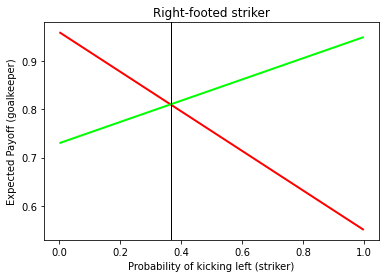

In [73]:
ig, ax = plt.subplots()
fig.tight_layout()

lines = [[(0, 0.96), (1, 0.55)], [(0, 0.73), (1, .95)]]
lc = col.LineCollection(lines, colors=c, linewidths=2)

ax.add_collection(lc)
ax.autoscale()
ax.set_title('Right-footed striker')
ax.set_ylabel('Expected Payoff (goalkeeper)')
ax.set_xlabel('Probability of kicking left (striker)')
ax.axvline(x=.365, color='black', linewidth=1)

plt.show()

<font color='blue'>
The red line represents the goalkeepers's payoff of playing Left; the green line that of playing Right.
</font>



8. Collect your findings from above to compile a <b>complete set of instructions</b> for the players in equilibrium.
<br>
(Hint: even if the computer always chooses one type of striker, you should specify what the goalkeeper should do against the other type; you already did the computation in part 5).

<font color='blue'>
    <b>Solution:</b> The instructions are:
    
 - Computer chooses a Right-footed striker.
 - Computer plays Left w.p approx. 0.365 (part 7.)
 - IF computer chooses a Right-footed striker, the goalkeeper plays Left w.p. 1/3.
 - IF computer chooses a Left-footed striker, the goalkeeper plays Left w.p. 0.6.
</font>

9. Is the game fair? If now, how is it not?

<font color='blue'>
    <b>Solution:</b> It is not. In equilibrium the computer wins ca 0.8 of all games.
</font>